In [33]:
pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import urllib.request
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# ambil artikel dari website
url = 'https://www.bbc.com/news/technology-61435563'
page = urllib.request.urlopen


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
pip install beautifulsoup4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from urllib.request import urlopen



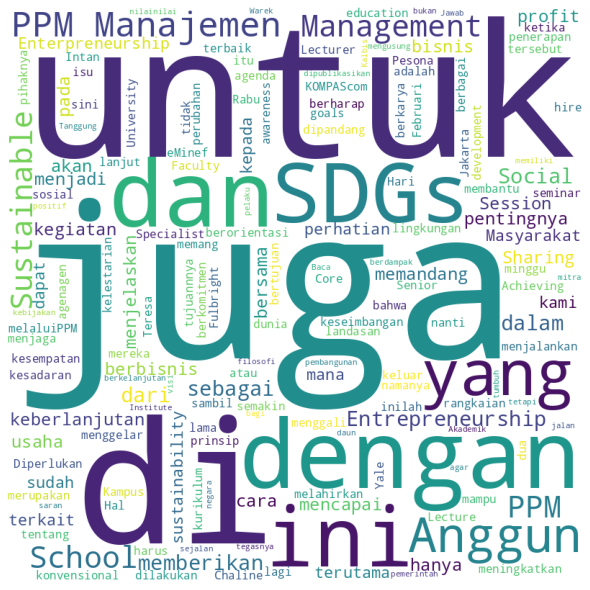

In [37]:
import urllib.request
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# ambil artikel dari website
url = 'https://www.kompas.com/edu/read/2023/02/10/154655871/ppm-manajemen-ingatkan-pentingnya-sustainable-entrepreneurship-untuk-perkuat'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
article = soup.find('div', class_='read__content')

# membersihkan artikel dari karakter-karakter yang tidak relevan
cleaned_article = re.sub(r'[^\w\s]', '', article.text)
cleaned_article = re.sub(r'http\S+', '', cleaned_article)
cleaned_article = re.sub(r'[^\x00-\x7F]+', '', cleaned_article)

# membuat Word Cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_article)

# menampilkan Word Cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


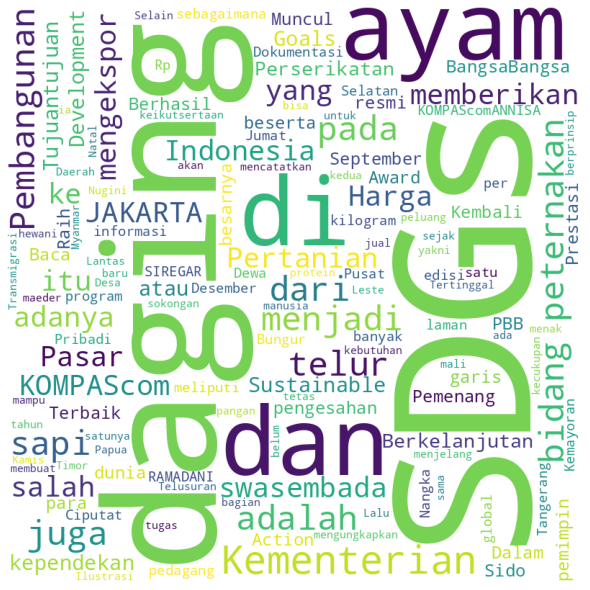

In [38]:
import urllib.request
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# ambil artikel dari website
url = 'https://www.kompas.com/stori/read/2022/12/15/170000279/telusuran-sdgs-ada-keikutsertaan-peternakan'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
article = soup.find('div', class_='read__content')

# membersihkan artikel dari karakter-karakter yang tidak relevan
cleaned_article = re.sub(r'[^\w\s]', '', article.text)
cleaned_article = re.sub(r'http\S+', '', cleaned_article)
cleaned_article = re.sub(r'[^\x00-\x7F]+', '', cleaned_article)

# membuat Word Cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(cleaned_article)

# menampilkan Word Cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.kompas.com/'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
article_links = []
article_titles = []
for link in soup.find_all('a'):
    article_link = link.get('href')
    if article_link.startswith('https://') and 'read' in article_link:
        article_links.append(article_link)
        article_titles.append(link.text.strip())

article_contents = []
for article_link in article_links:
    article_response = requests.get(article_link)
    article_soup = BeautifulSoup(article_response.text, 'html.parser')
    article_content = article_soup.find('div', {'class': 'read__content'}).text.strip()
    article_contents.append(article_content)

df = pd.DataFrame({'Title': article_titles, 'Content': article_contents})

df.to_csv('news_dataset.csv', index=False)


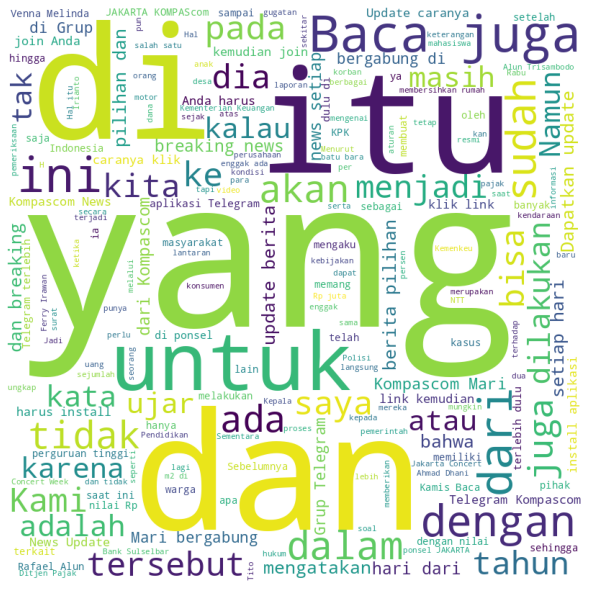

In [40]:
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = pd.read_csv('/content/news_dataset.csv')

all_contents = ' '.join(df['Content'])
cleaned_contents = re.sub(r'[^\w\s]', '', all_contents)
cleaned_contents = re.sub(r'http\S+', '', cleaned_contents)
cleaned_contents = re.sub(r'[^\x00-\x7F]+', '', cleaned_contents)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(cleaned_contents)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


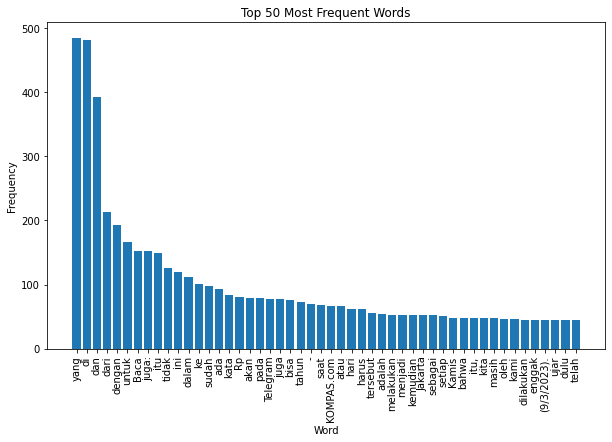

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
df = pd.read_csv('/content/news_dataset.csv')
all_contents = ' '.join(df['Content'])
words = all_contents.split()
word_counts = collections.Counter(words)
word_freq = []
for word, freq in word_counts.items():
    word_freq.append((word, freq))
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

top_words = word_freq[:50]

top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
plt.bar(top_words_df['Word'], top_words_df['Frequency'])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Words')
plt.show()


In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.kompas.com/tag/sdgs'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
article_links = []
article_titles = []
for link in soup.find_all('a'):
    article_link = link.get('href')
    if article_link.startswith('https://') and 'read' in article_link:
        article_links.append(article_link)
        article_titles.append(link.text.strip())

article_contents = []
for article_link in article_links:
    article_response = requests.get(article_link)
    article_soup = BeautifulSoup(article_response.text, 'html.parser')
    article_content = article_soup.find('div', {'class': 'read__content'}).text.strip()
    article_contents.append(article_content)

df = pd.DataFrame({'Title': article_titles, 'Content': article_contents})

df.to_csv('sgds_dataset.csv', index=False)

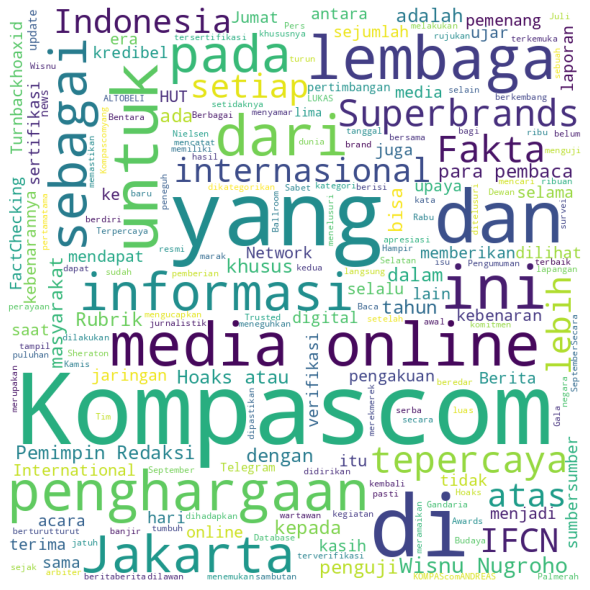

In [44]:
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sgds_dataset.csv')

all_contents = ' '.join(df['Content'])
cleaned_contents = re.sub(r'[^\w\s]', '', all_contents)
cleaned_contents = re.sub(r'http\S+', '', cleaned_contents)
cleaned_contents = re.sub(r'[^\x00-\x7F]+', '', cleaned_contents)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(cleaned_contents)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

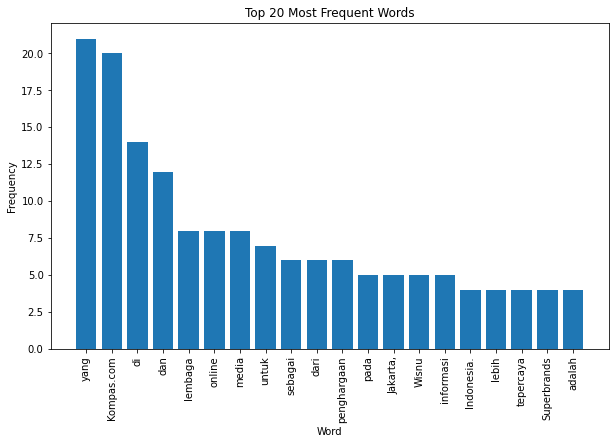

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
df = pd.read_csv('/content/sgds_dataset.csv')
all_contents = ' '.join(df['Content'])
words = all_contents.split()
word_counts = collections.Counter(words)
word_freq = []
for word, freq in word_counts.items():
    word_freq.append((word, freq))
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

top_words = word_freq[:20]

top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
plt.bar(top_words_df['Word'], top_words_df['Frequency'])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()